In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import math

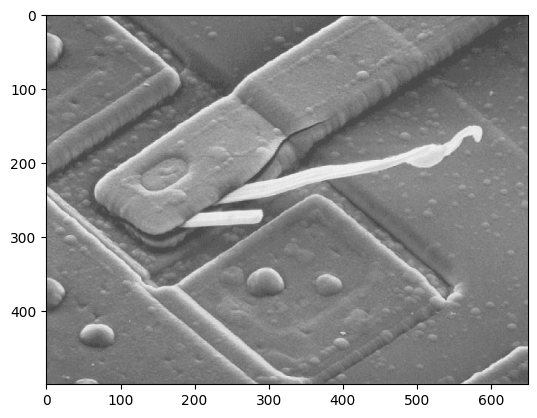

In [16]:
img=mpimg.imread('semimage_gray.jpg')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [17]:
M, N = img.shape
P = 2*M
Q = 2*N

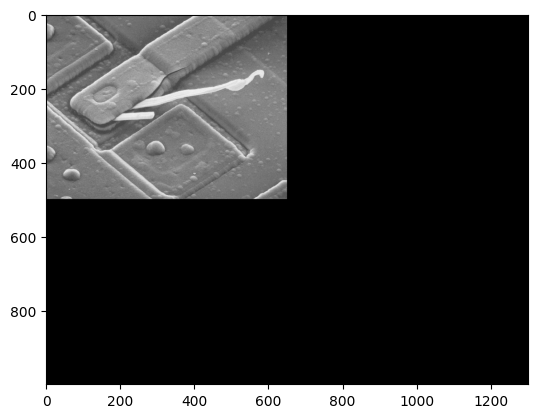

In [18]:
pad_img = np.pad(img, ((0, P-M), (0, Q-N)), mode='constant')
plt.imshow(pad_img, cmap='gray', vmin=0, vmax=255)

In [19]:
pad_img = np.int16(pad_img)
corr_img = np.copy(pad_img)

# even rows, odd columns
corr_img[::2,1::2] = corr_img[::2,1::2]*-1
# odd rows, even columns
corr_img[1::2,::2] = corr_img[1::2,::2]*-1

#plt.imshow(corr_img, cmap='gray')#, vmin=-255, vmax=255)
#print(corr_img)

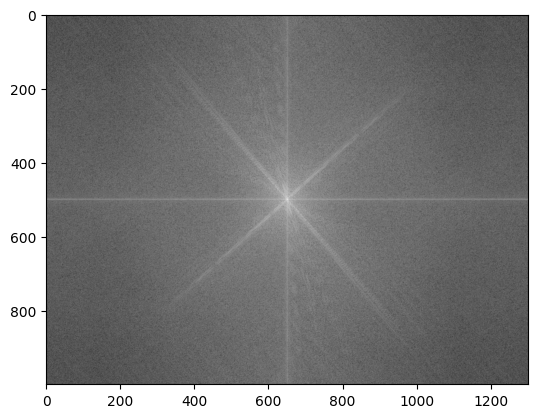

In [20]:
corr_dft = np.fft.fft2(corr_img)
plt.imshow(np.log10(abs(corr_dft)), cmap='gray')#, vmin=-255, vmax=255)

In [21]:
D  = np.zeros([P, Q], dtype='int16')
H  = np.zeros([P, Q], dtype='float')
D0 = 50
for u in range(P):
    for v in range(Q):
        #D[u,v] = ((u-0.5*P)**2 + (v-0.5*Q)**2)**0.5
        H[u,v] = math.exp(-((u-0.5*P)**2 + (v-0.5*Q)**2)/(2*D0**2))
        H = (D<=D0).astype(int)
#print(H)

KeyboardInterrupt: 

In [ ]:
G = np.multiply(H, corr_dft)

In [ ]:
filtered_img = np.fft.ifft2(G)
filtered_img[::2,1::2] = filtered_img[::2,1::2]*-1
filtered_img[1::2,::2] = filtered_img[1::2,::2]*-1
filtered_img = abs(filtered_img)
plt.imshow(filtered_img, cmap='gray', vmin=0, vmax=255)

In [ ]:
final_img = filtered_img[:M, :N]
plt.imshow(final_img, cmap='gray', vmin=0, vmax=255)